In [1]:
#Importation des libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#chargement des donnees
dataset=pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
#On définit X et Y
X=dataset.YearsExperience.values
Y=dataset.Salary.values
#On affiche
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [4]:
#On converti en vecteur lisible par sklearn
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
#On affiche
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [5]:
#Division des donnees
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               Y,
                                               test_size=0.3,
                                               random_state=0)

## Entrainement du modele

In [6]:
from sklearn.linear_model import LinearRegression
#Creation de l'objet
linear_reg=LinearRegression()
#Entrainement du modele
linear_reg.fit(X_train,y_train)

LinearRegression()

In [7]:
#On fait la prediction
pred_train=linear_reg.predict(X_test)

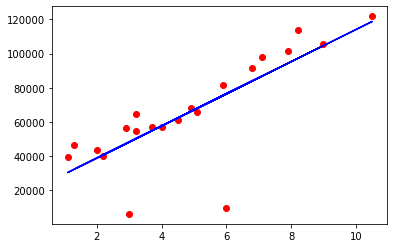

In [8]:
#Visualisation sur un graphique
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,linear_reg.predict(X_train),color='blue')
plt.show()

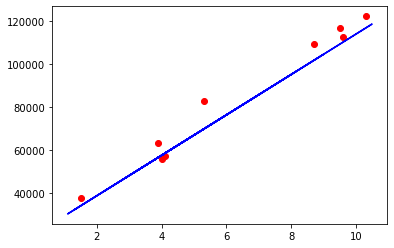

In [9]:
#Visualisation sur un graphique pour les donnees de test
plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,linear_reg.predict(X_train),color='blue')
plt.show()

In [10]:
#On test pour un nombre qlconq
linear_reg.predict([[1.5]])

array([[34036.7305151]])

In [11]:
#Mesures d'erreur
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,pred_train)
mse=np.sqrt(metrics.mean_squared_error(y_test,pred_train))
r2=metrics.r2_score(y_test,pred_train)

print("Les performances du Modèle")
print("==========================")
print('Mean Absolute Error={}'.format(mae))
print('Mean Squared Error={}'.format(mse))
print('R2 Score={}'.format(r2))

Les performances du Modèle
Mean Absolute Error=5544.85130245269
Mean Squared Error=6592.159862835884
R2 Score=0.9518378236760242


In [ ]:
#Exportation du modele en un fichier pkl à utiliser dans une application
import pickle
with open('model_salary_data.pkl','wb') as model_file:
    pickle.dump(linear_reg,model_file)